In [1]:
import pandas as pd
import datetime as dt
from path import Path
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.datasets import make_blobs
from collections import Counter

In [2]:
data = Path('Resources/dataset.csv')
df = pd.read_csv(data)
df.head()

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500.0,SWAP.HIVE,VIDEO,0,False,1,2020,1,0,QmeN4KuTQwHPWvGDhiopNJziqmf1feGeabDD4Gk7z9DgUL,./dataset/video/QmeN4KuTQwHPWvGDhiopNJziqmf1fe...
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20.0,SWAP.HIVE,GIF,0,False,2,2020,1,0,Qmb8WbXXdorG52sgY4mSyYUjevE65SGa2vhSxdXstfinz1,./dataset/gif/Qmb8WbXXdorG52sgY4mSyYUjevE65SGa...


In [3]:
df_clean = df.drop(columns=['symbol', 'cid', 'royalty', 'path'])
df_clean.head()

,title,name,creator,art_series,price,type,likes,nsfw,tokens,year,rights
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,PHOTO,2,False,30,2020,1
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500.0,VIDEO,0,False,1,2020,1
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,PHOTO,0,True,2,2021,1
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,PHOTO,1,False,2,2020,1
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20.0,GIF,0,False,2,2020,1


In [4]:
#Filter 'Year' column from 1998 to 2021
df_cleanv2 = df_clean[df_clean['year'].between(1998,2021)]
df_cleanv2.value_counts('year')

year
2020    2368
2021    1196
2019     231
2018     149
2017      69
2016      48
2013      18
2014      17
2012      15
2015      14
2011       8
2009       7
2007       5
1999       5
2010       5
2005       4
2006       3
2001       3
2000       3
2008       3
2003       2
2002       1
1998       1
dtype: int64

In [5]:
df_cleanv2['age'] = (2022 - df_cleanv2['year'])
df_cleanv2.head()

C:\Users\ariel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,name,creator,art_series,price,type,likes,nsfw,tokens,year,rights,age
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,PHOTO,2,False,30,2020,1,2
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500.0,VIDEO,0,False,1,2020,1,2
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,PHOTO,0,True,2,2021,1,1
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,PHOTO,1,False,2,2020,1,2
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20.0,GIF,0,False,2,2020,1,2


In [6]:
df_cleanv3 = df_cleanv2.drop(columns = ['year'])
df_cleanv3.head()

,title,name,creator,art_series,price,type,likes,nsfw,tokens,rights,age
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,PHOTO,2,False,30,1,2
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500.0,VIDEO,0,False,1,1,2
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,PHOTO,0,True,2,1,1
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,PHOTO,1,False,2,1,2
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20.0,GIF,0,False,2,1,2


In [26]:
# NSFW 1=True(NSFW) and 0=False(Safe)
df_cleanv3 ['nsfw_new'] = df_cleanv3['nsfw'].replace([False, True],[0,1])

In [30]:
nsfw_dataset = df_cleanv3.drop(columns = ['nsfw']).astype({'price': int})
nsfw_dataset.head()

,title,name,creator,art_series,price,type,likes,tokens,rights,age,nsfw_new
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50,PHOTO,2,30,1,2,0
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500,VIDEO,0,1,1,2,0
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10,PHOTO,0,2,1,1,1
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20,PHOTO,1,2,1,2,0
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20,GIF,0,2,1,2,0


In [28]:
nsfw_dataset.dtypes

title         object
name          object
creator       object
art_series    object
price          int32
type          object
likes          int64
tokens         int64
rights         int64
age            int64
nsfw_new       int64
dtype: object

In [31]:
nsfw_dataset.describe()

,price,likes,tokens,rights,age,nsfw_new
count,4.175000e+03,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,1.347995e+03,0.481198,4.167665,1.609341,2.203114,0.033054
std,4.107816e+04,0.936185,9.333806,0.920646,1.998907,0.178799
min,2.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000e+01,0.000000,1.000000,1.000000,1.000000,0.000000
50%,6.000000e+01,0.000000,3.000000,1.000000,2.000000,0.000000
75%,1.500000e+02,1.000000,5.000000,3.000000,2.000000,0.000000
max,2.500000e+06,10.000000,500.000000,3.000000,24.000000,1.000000


In [46]:
sum_price_by_type = nsfw_dataset.groupby(["nsfw_new"]).sum()["price"]
sum_price_by_type

nsfw_new
0    5564846
1      63032
Name: price, dtype: int32

In [47]:
total_price = nsfw_dataset["price"].sum()
total_price

5627878

In [48]:
type_percents = 100 * sum_price_by_type / total_price
type_percents

nsfw_new
0    98.880004
1     1.119996
Name: price, dtype: float64

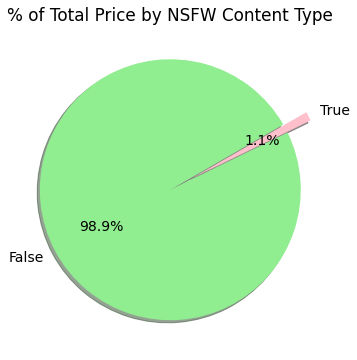

In [49]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["False", "True"],
    colors=["lightgreen", "pink"],
    explode=[0, 0.2],
    autopct='%1.1f%%',
    shadow=True, startangle=30)
plt.title("% of Total Price by NSFW Content Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

In [51]:
nsfw_true = nsfw_dataset[nsfw_dataset['nsfw_new'] == 1]
nsfw_false = nsfw_dataset[nsfw_dataset['nsfw_new'] == 0]                        

In [103]:
true_avg_price = nsfw_true.groupby(['age']).mean()["price"]
true_avg_price

age
1      101.106383
2      186.202703
3     4752.777778
4      375.000000
5       75.000000
6       42.000000
7        4.000000
19     105.000000
Name: price, dtype: float64

In [104]:
false_avg_price = nsfw_false.groupby(['age']).mean()["price"]
false_avg_price

age
1      741.164491
2     1826.630340
3      669.797297
4      226.365517
5      206.852941
6     1898.787234
7      204.230769
8      207.352941
9     1711.055556
10    8961.733333
11    2698.750000
12     511.600000
13      24.285714
14      30.000000
15     348.000000
16     119.000000
17     243.500000
19     200.000000
20      10.000000
21     504.333333
22    7374.666667
23    2240.000000
24    4200.000000
Name: price, dtype: float64

In [111]:
true_price_count = nsfw_true.groupby(['age']).count()["price"]
true_price_count

age
1     47
2     74
3      9
4      4
5      1
6      1
7      1
19     1
Name: price, dtype: int64

In [112]:
false_price_count = nsfw_false.groupby(['age']).count()["price"]
false_price_count

age
1     1149
2     2294
3      222
4      145
5       68
6       47
7       13
8       17
9       18
10      15
11       8
12       5
13       7
14       3
15       5
16       3
17       4
19       1
20       1
21       3
22       3
23       5
24       1
Name: price, dtype: int64

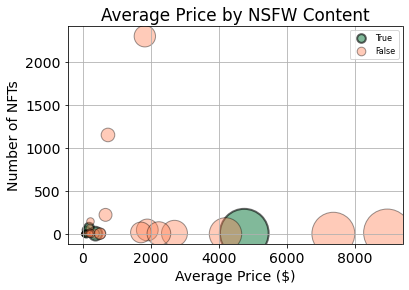

In [144]:
# Build the scatter plots for urban cities.
plt.scatter(true_avg_price,
      true_price_count,
      s=0.5*true_avg_price,
      c="seagreen",
      edgecolor="black", linewidths=2,
      alpha=0.6, label="True")

plt.scatter(false_avg_price,
      false_price_count,
      s=0.25*false_avg_price,
      c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.4, label="False")

plt.title("Average Price by NSFW Content")
plt.xlabel("Average Price ($)")
plt.ylabel("Number of NFTs")
plt.grid(True)
# Add the legend.
lgnd = plt.legend(fontsize="8", mode="Expanded",
         scatterpoints=1, loc="best")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
plt.show()

In [159]:
nsfw_df = pd.DataFrame({
    "True": true_price_count,          
    "False": false_price_count 
})

nsfw_df = nsfw_df.fillna(0)
nsfw_df.head()

,True,False
age,,
1,47.0,1149
2,74.0,2294
3,9.0,222
4,4.0,145
5,1.0,68


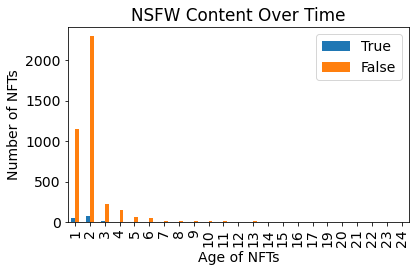

In [164]:
# Create bar chart (of sorted values)
nsfw_df.sort_values(by="age").plot.bar() 

# Set textual properties
plt.title("NSFW Content Over Time")
plt.xlabel("Age of NFTs")
plt.ylabel("Number of NFTs")

# Resize plot to display labels
plt.tight_layout()

# Show plot
plt.show()